In [1]:
from dataset import FTSE_MIB
import yfinance as yf
import pandas as pd
import numpy as np
import os


index_file = './data/ftse.csv'

if not os.path.exists(index_file):
    ftse = FTSE_MIB()
    dfMib = ftse.get_dataframe()
    dfMib.to_csv(index_file)
else:
    dfMib = pd.read_csv(index_file)

In [2]:
weight = dfMib['capitalization'] / dfMib['capitalization'].sum()
weight = np.round(weight * 100,2)
dfMib['weight'] = weight
dfMib.sort_values(by='weight',ascending=False,inplace=True)

index_file_weighted = './data/ftse_weighted.csv'
dfMib.set_index('isin', inplace=True)
dfMib.to_csv(index_file_weighted)

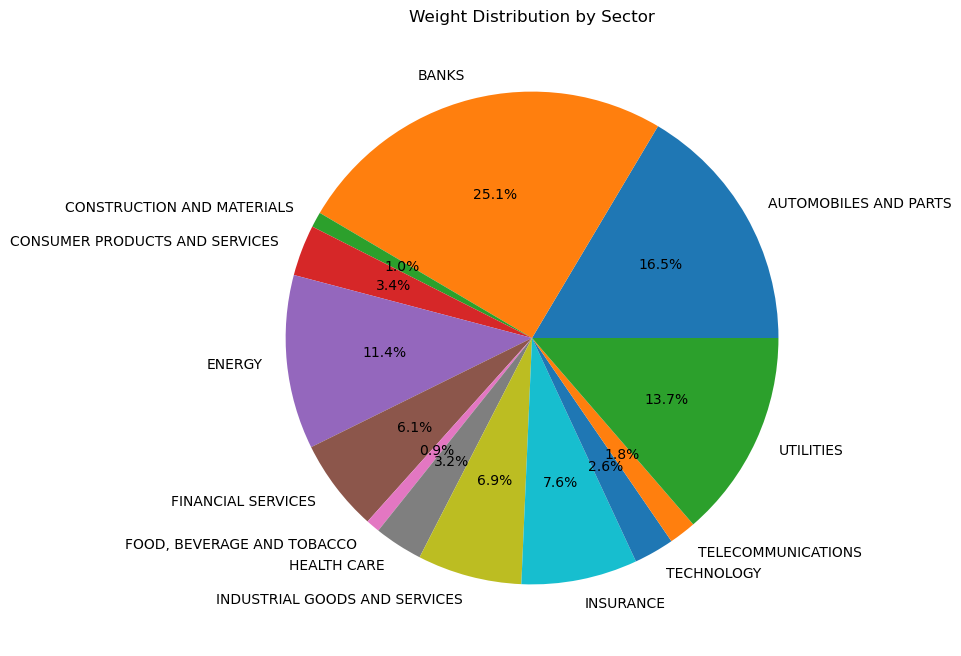

In [24]:
import matplotlib.pyplot as plt

grouped_df = dfMib.groupby('sector')['weight'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['weight'], labels=grouped_df['sector'], autopct='%1.1f%%')
plt.title('Weight Distribution by Sector')
plt.show()

In [3]:
from dataset import get_return_data

start_date = '2000-01-01'
end_date = '2024-12-31'
dfRet = get_return_data(dfMib['ticker'],'MI', start_date, end_date)

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


In [4]:
index = 'FTSEMIB.MI'
dfIndex = yf.download([index], start=start_date, end=end_date)
dfIndex = dfIndex['Close'].pct_change()
dfIndex.rename(index,inplace=True)

dfRet = pd.concat([dfRet, dfIndex], axis=1)

[*********************100%%**********************]  1 of 1 completed


In [5]:
columns = dfRet.columns
columns = [column.replace('.MI','') for column in columns]
dfRet.columns = columns

columns

['ENEL',
 'ENI',
 'G',
 'ISP',
 'PRY',
 'RACE',
 'STLAM',
 'STMMI',
 'TEN',
 'UCG',
 'BAMI',
 'BMED',
 'FBK',
 'LDO',
 'MB',
 'MONC',
 'PST',
 'REC',
 'SRG',
 'TRN',
 'A2A',
 'AMP',
 'BC',
 'BMPS',
 'BPE',
 'BZU',
 'CPR',
 'INW',
 'NEXI',
 'UNI',
 'AZM',
 'BPSO',
 'DIA',
 'HER',
 'IG',
 'IP',
 'IVG',
 'PIRC',
 'SPM',
 'TIT',
 'FTSEMIB']

In [6]:
dfRet

,ENEL,ENI,G,ISP,PRY,RACE,STLAM,STMMI,TEN,UCG,...,BPSO,DIA,HER,IG,IP,IVG,PIRC,SPM,TIT,FTSEMIB
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.034582,-0.020992,-0.014446,0.007692,NaN,NaN,0.032646,-0.040461,NaN,-0.014706,...,0.039275,NaN,NaN,NaN,-0.018827,NaN,NaN,-0.047354,-0.036082,-0.022122
2000-01-05,-0.020896,0.007797,-0.017915,-0.015268,NaN,NaN,0.034942,-0.083305,NaN,-0.025586,...,-0.014535,NaN,NaN,NaN,-0.002132,NaN,NaN,0.023392,-0.032850,-0.021382
2000-01-06,0.024390,0.019342,0.001658,-0.038760,NaN,NaN,0.009646,-0.080030,NaN,0.002188,...,-0.002949,NaN,NaN,NaN,-0.006411,NaN,NaN,0.005714,-0.052133,-0.015639
2000-01-07,0.014881,0.020873,0.021523,0.037633,NaN,NaN,0.015924,0.031707,NaN,-0.006550,...,-0.006509,NaN,NaN,NaN,0.017206,NaN,NaN,0.036932,0.066667,0.034994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.016628,-0.008532,-0.008422,-0.012051,-0.011966,-0.015414,-0.029975,-0.062711,-0.009354,-0.028553,...,-0.009639,-0.017877,-0.001786,-0.016729,-0.047896,-0.023295,-0.008680,0.034442,-0.078561,-0.017848
2024-12-20,0.000735,-0.004538,-0.000739,-0.004931,-0.000327,0.006849,0.001294,0.005735,-0.003055,0.001463,...,-0.014599,0.008146,0.000596,0.013233,0.006582,-0.013203,0.007297,-0.060916,-0.036653,-0.000622
2024-12-23,-0.001029,-0.001729,0.000000,-0.003652,0.007531,-0.008260,-0.002908,0.008237,0.000836,0.001594,...,-0.009259,-0.000997,0.005364,0.001866,-0.008407,-0.005611,-0.011590,0.000000,0.000827,-0.000770


In [17]:
indColumns = dfMib['ticker'].tolist()
indColumns.append(columns[-1])
dfRet = dfRet[indColumns]
dfRet.head()

,RACE,ISP,ENEL,UCG,G,ENI,STLAM,TEN,STMMI,PRY,...,DIA,HER,IP,SPM,IG,TIT,BPSO,AZM,IVG,FTSEMIB
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,0.007692,-0.034582,-0.014706,-0.014446,-0.020992,0.032646,NaN,-0.040461,NaN,...,NaN,NaN,-0.018827,-0.047354,NaN,-0.036082,0.039275,NaN,NaN,-0.022122
2000-01-05,NaN,-0.015268,-0.020896,-0.025586,-0.017915,0.007797,0.034942,NaN,-0.083305,NaN,...,NaN,NaN,-0.002132,0.023392,NaN,-0.032850,-0.014535,NaN,NaN,-0.021382
2000-01-06,NaN,-0.038760,0.024390,0.002188,0.001658,0.019342,0.009646,NaN,-0.080030,NaN,...,NaN,NaN,-0.006411,0.005714,NaN,-0.052133,-0.002949,NaN,NaN,-0.015639
2000-01-07,NaN,0.037633,0.014881,-0.006550,0.021523,0.020873,0.015924,NaN,0.031707,NaN,...,NaN,NaN,0.017206,0.036932,NaN,0.066667,-0.006509,NaN,NaN,0.034994


In [8]:
for ticker in dfRet.columns:
    first_non_na_index = dfRet[ticker].first_valid_index()
    non_na_count = dfRet[ticker].count()
    
    print("IL ticker {0} inizia alla data {1} e ha {2} valori".format(ticker,first_non_na_index,non_na_count))

IL ticker RACE inizia alla data 2016-01-05 00:00:00 e ha 2287 valori
IL ticker ISP inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker ENEL inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker UCG inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker G inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker ENI inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker STLAM inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker TEN inizia alla data 2002-12-18 00:00:00 e ha 5618 valori
IL ticker STMMI inizia alla data 2000-01-04 00:00:00 e ha 6389 valori
IL ticker PRY inizia alla data 2007-05-04 00:00:00 e ha 4486 valori
IL ticker PST inizia alla data 2015-10-28 00:00:00 e ha 2333 valori
IL ticker LDO inizia alla data 2005-07-19 00:00:00 e ha 4944 valori
IL ticker MONC inizia alla data 2013-12-17 00:00:00 e ha 2802 valori
IL ticker TRN inizia alla data 2004-06-24 00:00:00 e ha 5222 valori
IL ticker SRG inizia alla data 2001-12-07 0

In [9]:
return_file = './data/ftse_return.csv'
dfRet.to_csv(return_file)

In [11]:
corr = dfRet.corr()
corr

,RACE,ISP,ENEL,UCG,G,ENI,STLAM,TEN,STMMI,PRY,...,DIA,HER,IP,SPM,IG,TIT,BPSO,AZM,IVG,FTSEMIB
RACE,1.000000,0.423018,0.425341,0.359456,0.421918,0.364905,0.510801,0.286714,0.482177,0.483133,...,0.271726,0.312022,0.471372,0.190978,0.351070,0.315327,0.309204,0.465925,0.378849,0.625993
ISP,0.423018,1.000000,0.536560,0.669148,0.669691,0.534870,0.513961,0.411772,0.428256,0.522908,...,0.188268,0.333674,0.335861,0.314869,0.407733,0.433213,0.495398,0.599558,0.446908,0.802059
ENEL,0.425341,0.536560,1.000000,0.426033,0.521332,0.571088,0.432835,0.402044,0.390036,0.487460,...,0.253447,0.480288,0.321674,0.295291,0.620168,0.457244,0.378023,0.491233,0.346404,0.742009
UCG,0.359456,0.669148,0.426033,1.000000,0.614990,0.422035,0.421426,0.357714,0.333978,0.476208,...,0.138370,0.275087,0.270775,0.271771,0.318436,0.345364,0.440355,0.510094,0.392573,0.662042
G,0.421918,0.669691,0.521332,0.614990,1.000000,0.528322,0.468159,0.404698,0.408279,0.531204,...,0.207158,0.333803,0.309632,0.310948,0.476468,0.383615,0.408640,0.570203,0.385571,0.730496
ENI,0.364905,0.534870,0.571088,0.422035,0.528322,1.000000,0.448441,0.633273,0.376377,0.469964,...,0.173053,0.359020,0.315482,0.477861,0.399804,0.426057,0.380809,0.492106,0.318096,0.737161
STLAM,0.510801,0.513961,0.432835,0.421426,0.468159,0.448441,1.000000,0.409746,0.457724,0.491054,...,0.193025,0.300165,0.361216,0.308084,0.315419,0.369387,0.347420,0.520070,0.509333,0.662972
TEN,0.286714,0.411772,0.402044,0.357714,0.404698,0.633273,0.409746,1.000000,0.370708,0.434428,...,0.133436,0.256524,0.316179,0.478857,0.216480,0.340230,0.313835,0.416317,0.277305,0.576671
STMMI,0.482177,0.428256,0.390036,0.333978,0.408279,0.376377,0.457724,0.370708,1.000000,0.488586,...,0.231853,0.264086,0.338740,0.235106,0.260138,0.369101,0.266800,0.456258,0.393946,0.631129
PRY,0.483133,0.522908,0.487460,0.476208,0.531204,0.469964,0.491054,0.434428,0.488586,1.000000,...,0.245202,0.328359,0.404295,0.312144,0.330836,0.382632,0.366036,0.511069,0.396066,0.653055


In [12]:
corr_inv = pd.DataFrame(np.linalg.pinv(corr.values), corr.columns, corr.index)
corr_inv

,RACE,ISP,ENEL,UCG,G,ENI,STLAM,TEN,STMMI,PRY,...,DIA,HER,IP,SPM,IG,TIT,BPSO,AZM,IVG,FTSEMIB
RACE,1.828794,0.462531,0.376889,0.258863,0.296387,0.373379,-0.052583,-0.060616,0.019889,-0.428558,...,-0.127714,0.144727,0.017865,0.046956,-0.466343,0.157391,0.154127,-0.276100,0.009237,-1.463623
ISP,0.462531,3.791335,0.469426,-0.307844,-0.162930,0.559074,0.138069,0.162113,0.470345,-0.135530,...,0.002757,-0.042409,0.015483,0.155904,0.239181,0.417283,-0.077455,-0.372846,0.278206,-4.327919
ENEL,0.376889,0.469426,3.034696,0.205162,0.120051,0.219283,0.162791,0.075501,0.417194,-0.164512,...,-0.042963,-0.304773,-0.039991,0.155922,0.089483,0.248697,-0.013864,-0.253939,0.164503,-3.612037
UCG,0.258863,-0.307844,0.205162,2.356943,-0.432679,0.411739,0.106440,0.077728,0.281936,-0.143107,...,0.068886,-0.157579,-0.011074,0.086805,0.471564,0.267497,-0.061424,-0.128079,0.108321,-2.024668
G,0.296387,-0.162930,0.120051,-0.432679,2.884547,0.038933,-0.023244,0.134201,0.113850,-0.222734,...,-0.021665,0.103782,-0.155497,0.030578,-0.392708,0.271925,0.056710,-0.128014,0.440243,-2.091662
ENI,0.373379,0.559074,0.219283,0.411739,0.038933,3.315499,0.218893,-0.797597,0.602868,-0.171221,...,-0.012536,-0.275064,-0.031056,-0.186770,0.319411,0.384946,-0.056778,-0.459273,0.372109,-4.443945
STLAM,-0.052583,0.138069,0.162791,0.106440,-0.023244,0.218893,1.997929,0.019334,0.084968,-0.040662,...,0.052336,-0.199815,-0.056917,-0.005441,0.536977,0.204819,-0.004698,-0.185347,-0.240799,-1.821875
TEN,-0.060616,0.162113,0.075501,0.077728,0.134201,-0.797597,0.019334,1.838659,-0.105109,-0.265670,...,-0.031068,0.162967,0.135020,-0.428742,-0.298433,-0.100141,0.115205,-0.067293,-0.066933,0.234862
STMMI,0.019889,0.470345,0.417194,0.281936,0.113850,0.602868,0.084968,-0.105109,2.165688,-0.280356,...,-0.067072,-0.179495,-0.023299,0.132153,0.579429,0.239416,0.019602,-0.258856,0.080294,-2.939772
PRY,-0.428558,-0.135530,-0.164512,-0.143107,-0.222734,-0.171221,-0.040662,-0.265670,-0.280356,1.921518,...,-0.081747,0.168464,0.131871,-0.153868,-0.292112,-0.195581,0.122207,0.030078,-0.221311,1.129400


,RACE,ISP,ENEL,UCG,G,ENI,STLAM,TEN,STMMI,PRY,...,DIA,HER,IP,SPM,IG,TIT,BPSO,AZM,IVG,FTSEMIB
RACE,1.000000e+00,4.119481e-15,3.741438e-16,-5.915690e-16,-2.879209e-15,3.173026e-15,2.197786e-16,-9.187426e-16,1.512053e-15,1.142565e-16,...,-3.186143e-16,-8.376283e-16,1.830083e-16,6.805192e-17,4.223396e-16,7.453821e-17,-4.976541e-16,-1.453524e-15,5.425046e-16,-4.864571e-15
ISP,-2.012865e-16,1.000000e+00,-1.300704e-16,3.037085e-16,7.680986e-16,2.885774e-15,-1.408907e-15,1.035434e-15,1.155923e-15,-7.815763e-16,...,-8.000173e-16,-1.547510e-15,3.266389e-17,-1.549782e-16,4.551511e-16,7.675548e-16,-6.212009e-16,-1.717874e-15,8.277977e-16,-3.701205e-15
ENEL,2.647937e-16,2.311353e-15,1.000000e+00,-9.029100e-16,5.265480e-16,3.101822e-15,3.666566e-16,-4.608434e-16,9.003531e-18,-1.186143e-15,...,-5.532438e-16,-1.395074e-15,-2.941515e-16,4.824778e-16,-1.408548e-15,6.849132e-16,1.758641e-17,3.681131e-16,1.099730e-15,-5.127904e-15
UCG,-1.786671e-15,-3.295505e-15,-3.778710e-15,1.000000e+00,-7.037461e-16,-1.683381e-15,-2.860151e-16,-2.455393e-17,-1.549056e-15,1.547942e-15,...,-2.598708e-16,-1.507902e-15,-2.928208e-16,-2.576796e-16,-9.171358e-17,-8.486288e-16,-3.080697e-16,1.413104e-15,-2.070890e-16,1.046581e-14
G,1.600115e-16,-3.275625e-15,-2.600393e-17,-1.810890e-16,1.000000e+00,-7.959071e-16,-6.485537e-16,6.440495e-16,-5.046400e-16,-9.618048e-16,...,-4.886661e-16,-2.115808e-16,-3.300744e-16,-7.470147e-16,-1.529282e-15,-7.333359e-16,4.311619e-16,2.647637e-16,-1.782016e-16,1.040419e-14
ENI,1.690942e-16,4.430805e-15,1.405943e-15,1.033387e-15,1.110909e-15,1.000000e+00,4.755089e-17,-9.470439e-16,1.757672e-15,-1.617783e-15,...,-3.558397e-16,-1.424089e-15,4.645153e-18,5.009703e-16,6.567661e-16,1.586584e-15,-3.710926e-16,-2.372310e-15,1.183714e-15,-1.233500e-14
STLAM,-9.436666e-16,-9.048987e-16,-5.674278e-16,-3.532417e-17,-7.489967e-16,-5.392112e-16,1.000000e+00,-5.990811e-16,-7.102207e-16,3.836815e-16,...,-4.176353e-16,-7.259296e-16,-4.185200e-16,3.934115e-16,3.959422e-16,-5.413289e-16,-1.436184e-16,-5.779205e-16,2.191353e-16,8.362549e-15
TEN,-2.750165e-16,-2.082948e-15,5.036051e-16,1.908158e-16,1.056367e-15,2.237406e-15,4.863659e-16,1.000000e+00,-8.102646e-16,-1.887799e-15,...,2.343279e-16,-1.486031e-15,4.275561e-16,2.505029e-16,-4.518015e-16,-1.121848e-16,3.322892e-16,1.382719e-16,-8.521983e-16,2.050217e-15
STMMI,1.350018e-16,2.409384e-15,1.230336e-15,1.383157e-15,9.186645e-16,1.570868e-15,4.963994e-16,9.503378e-16,1.000000e+00,-2.814436e-16,...,-8.825869e-16,-2.563824e-16,1.753432e-16,4.087225e-16,-1.066334e-15,8.610139e-16,-4.627379e-16,-1.999855e-16,1.057850e-15,-1.092968e-14
PRY,9.727864e-16,-4.640910e-16,1.419063e-15,-4.288750e-16,-7.571655e-16,1.798813e-15,-1.213232e-15,-5.801819e-16,3.358752e-16,1.000000e+00,...,-5.391945e-16,-3.866860e-16,-2.552109e-16,1.741159e-16,-8.649971e-16,-4.157549e-16,-1.816987e-16,-1.490997e-16,1.379715e-16,-2.755952e-15
